In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import pandas as pd
from statistics import mean
from random import choice
%matplotlib inline
import matplotlib.pyplot as plt

from gendis.genetic import GeneticExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff,scale_down, get_distance
from tools.experiments import Experiments

np.random.seed(1337)  # Random seed for reproducibility

tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 150}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

gen_options = {"population_size": 20,
               "iterations": 20,
               "verbose": True,
               "normed": True,
               "add_noise_prob": 0.0,
               "add_shapelet_prob": 0.3,
               "wait": 10,
               "plot": True,
               "remove_shapelet_prob": 0.3,
               "crossover_prob": 0.66,
               "n_jobs": 4}

settings = {"trajectory_generator_options": tr_gen_options,
            "data_generation_options": dt_gen_options,
            "train_test_options":train_test_options,
            "define_csvs_option": df_csv_options,
            "genetic_options": gen_options}

tr_gen_options = settings["trajectory_generator_options"]
dt_gen_options = settings["data_generation_options"]
df_csvs_options = settings["define_csvs_option"]
train_test_options = settings["train_test_options"]
genetic_options = settings["genetic_options"]

first_movement = ['creeping_line_left']
second_movement = ['random']
movements = {'first_movement': first_movement,'second_movement': second_movement}
set_movements(movements)


In [2]:
# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)
# Read in the datafiles
dex = DataExtractor()
train_df, test_df = dex.train_test_dataframes(**train_test_options)
print("The train samples length is:{0}".format(len(train_df[0] * train_test_options["split"]*2)))
print("The test samples length is:{0}\n".format(len(test_df[0] * train_test_options["split"]*2)))
dex.define_csv(**df_csvs_options)

x_train, y_train, x_test, y_test = dex.load_datasets()

2019-06-04 01:45:44.105 | INFO     | tools.trajectory_generator:data_generation:623 - 
 Starting the generator with attributes: 
Original latitude: 37.295493
Original longitude: 23.824322
Initial bearing: 90
Initial speed: 10
Number of samples: 25
Starting time of measurements: 2015-02-01 12:00:00
With initial frequency of collected data: 3 min
and hard reset of data: True
2019-06-04 01:45:44.107 | INFO     | tools.trajectory_generator:data_generation:626 - Create directory 'generator_data' 
2019-06-04 01:45:44.109 | INFO     | tools.trajectory_generator:data_generation:632 - now creating data for movement: creeping_line_left
2019-06-04 01:45:53.118 | INFO     | tools.trajectory_generator:data_generation:637 - now creating data for movement: random
2019-06-04 01:46:23.595 | SUCCESS  | tools.trajectory_generator:data_generation:670 - Done with generator
2019-06-04 01:46:23.597 | INFO     | tools.data_extraction:read_datasets:22 - Reading the data files
2019-06-04 01:46:24.354 | SUCCESS 

The train samples length is:6000
The test samples length is:1500



In [3]:
# x_train, y_train, x_test, y_test = dex.load_datasets()
# labels = ["TIMESTAMP","LAT","LON","HEADING"]
# real_data =  pd.read_csv("/home/kapadais/Desktop/HUA Thesis/ptixiaki hua/data/route.csv", engine='python')
# real_data = real_data [labels]
# real_data.sort_values('TIMESTAMP',inplace=True)
# real_data=real_data.reset_index(drop=True)
# data = scale_down(real_data,train_test_options["split"])
# y_test = np.array([0,1])
# a=np.array(data["HEADING"].values).astype(int)
# x_test=np.array([a,x_test[1]])

In [4]:
# x_train=angle_diff(x_train)
# x_test=angle_diff(x_test)


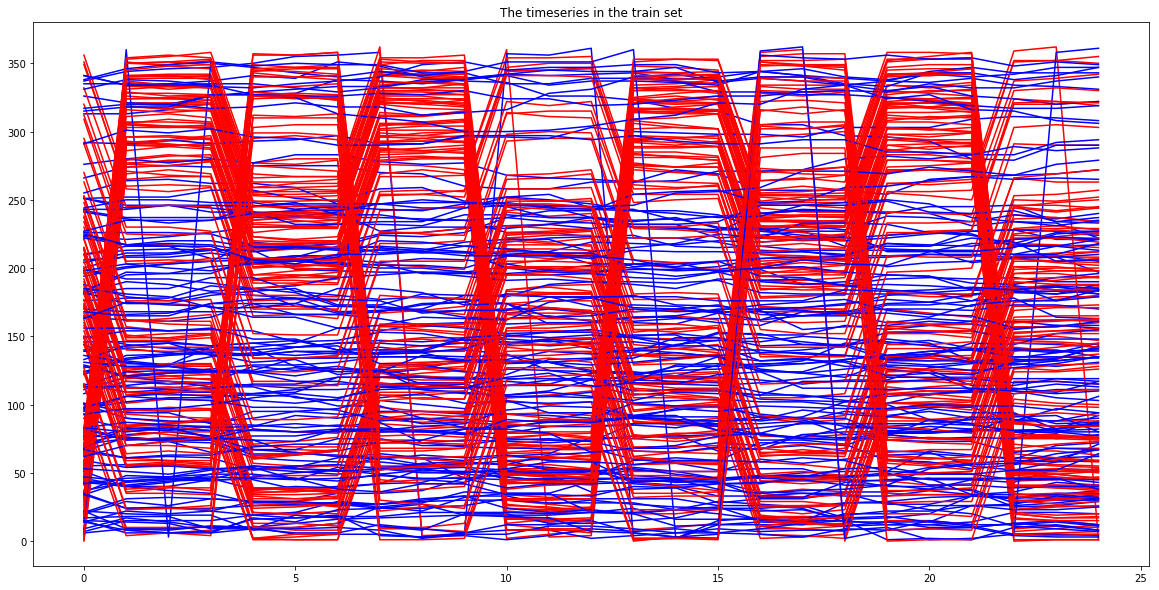

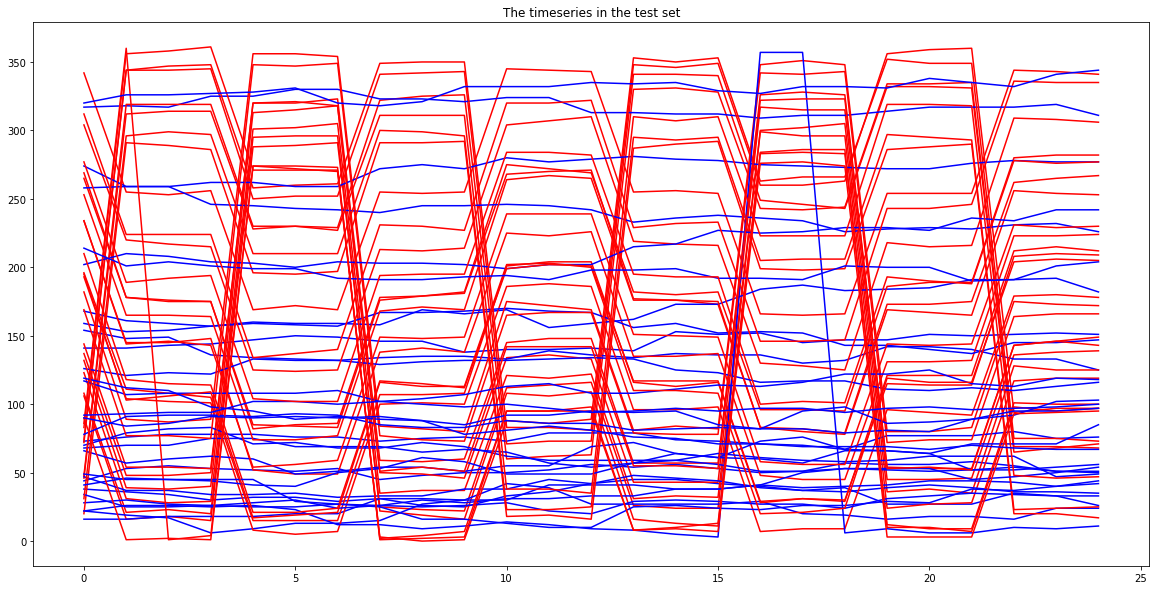

In [5]:
# Visualize the timeseries in the train and test set
colors = ['r', 'b', 'g', 'y', 'c']
plt.figure(figsize=(20, 10))
for ts, label in zip(x_train, y_train):
    plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
plt.title('The timeseries in the train set')
plt.show()

plt.figure(figsize=(20, 10))
for ts, label in zip(x_test, y_test):
    plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
plt.title('The timeseries in the test set')
plt.show()

standardized train and test data



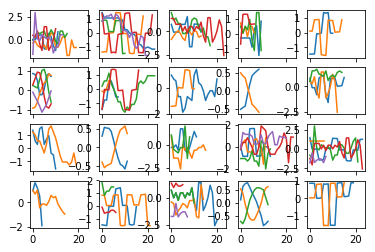

it		avg		std		max		time
1		-0.4131		0.101		-0.279728	10.0001
2		-0.3562		0.077		-0.279728	10.2227
3		-0.2785		0.054		-0.223192	12.1762
4		-0.2221		0.048		-0.17063	14.1592
5		-0.221		0.065		-0.148469	15.0551
6		-0.1749		0.034		-0.148469	19.9627
7		-0.1869		0.034		-0.148469	16.6059
8		-0.1684		0.033		-0.14244	22.9229
9		-0.1433		0.019		-0.120832	22.1092
10		-0.1486		0.03		-0.106858	26.4159
11		-0.1641		0.033		-0.10216	28.8741
12		-0.1479		0.033		-0.10216	28.1989
13		-0.1228		0.025		-0.087054	28.7377
14		-0.1154		0.036		-0.066389	27.6964
15		-0.08		0.016		-0.06553	27.4178
16		-0.0768		0.011		-0.06522	28.14
17		-0.0737		0.007		-0.06522	28.8712
18		-0.0685		0.005		-0.058974	25.5818
19		-0.0655		0.005		-0.058974	29.8493
20		-0.0674		0.004		-0.058974	28.6212


In [6]:
print("standardized train and test data\n")
x_train, x_test = standardize_data(x_train, x_test)
genetic_extractor = GeneticExtractor(**genetic_options)
print_genetic_param(genetic_extractor)
genetic_extractor.fit(x_train, y_train)

In [7]:
distances_train = genetic_extractor.transform(x_train)
distances_test = genetic_extractor.transform(x_test)
lr = LogisticRegression()
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
accuracy_result = accuracy_score(y_test, lr.predict(distances_test))
print('Accuracy = {}'.format(accuracy_result))

Accuracy = 0.9833333333333333


In [8]:
lr.predict(distances_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [9]:
lr.predict_proba(distances_test)

array([[9.74362937e-01, 2.56370629e-02],
       [1.07873936e-03, 9.98921261e-01],
       [9.66426106e-01, 3.35738944e-02],
       [1.24682100e-03, 9.98753179e-01],
       [9.77957423e-01, 2.20425770e-02],
       [2.76689935e-03, 9.97233101e-01],
       [9.99910473e-01, 8.95266178e-05],
       [6.05430615e-01, 3.94569385e-01],
       [9.99904574e-01, 9.54258637e-05],
       [2.80351110e-03, 9.97196489e-01],
       [9.99926866e-01, 7.31335836e-05],
       [1.28798248e-03, 9.98712018e-01],
       [9.72866787e-01, 2.71332132e-02],
       [1.70750300e-01, 8.29249700e-01],
       [9.99920468e-01, 7.95318028e-05],
       [2.85454694e-02, 9.71454531e-01],
       [9.61869142e-01, 3.81308580e-02],
       [9.21588422e-03, 9.90784116e-01],
       [9.77222584e-01, 2.27774156e-02],
       [4.52529148e-05, 9.99954747e-01],
       [9.99898632e-01, 1.01368119e-04],
       [5.54986075e-03, 9.94450139e-01],
       [9.68920226e-01, 3.10797739e-02],
       [5.80637107e-03, 9.94193629e-01],
       [9.793294